# Building an Image Classifier

Import libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

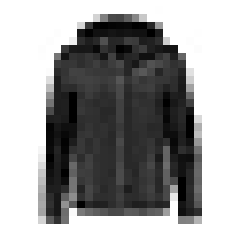

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

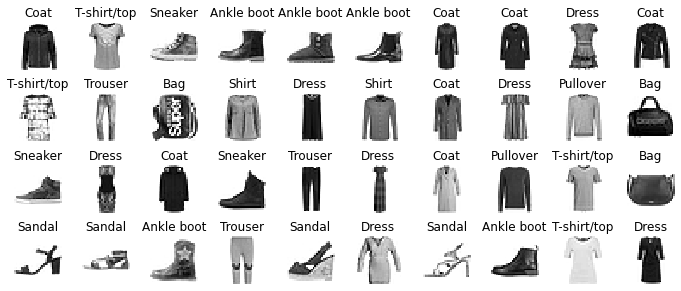

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.layers

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
hidden1 = model.layers[1]

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy

<hr>

Now we can access the training and validation loss, as well as accuracy (because we defined accuracy as a metric when compiling our model) by using ```history```

In [24]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [25]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
history.history['loss']

[0.7237029075622559,
 0.484192818403244,
 0.43905338644981384,
 0.41231462359428406,
 0.3939222991466522,
 0.3750678300857544,
 0.3630312979221344,
 0.35152509808540344,
 0.3412765860557556,
 0.3317754566669464,
 0.3238329291343689,
 0.3146835267543793,
 0.30778029561042786,
 0.30192798376083374,
 0.2943917214870453,
 0.28883519768714905,
 0.2835114002227783,
 0.27753812074661255,
 0.2725583016872406,
 0.26720917224884033]

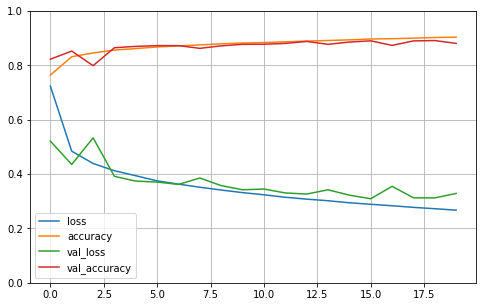

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3650 - accuracy: 0.8645


[0.364972859621048, 0.8644999861717224]

In [31]:
X_new = X_test[:6]
y_proba = model.predict(X_new)

This is the prediction of our model:

In [32]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

This is the true label:

In [35]:
y_new = np.array(class_names)[y_test[:6]]
y_new

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser'],
      dtype='<U11')

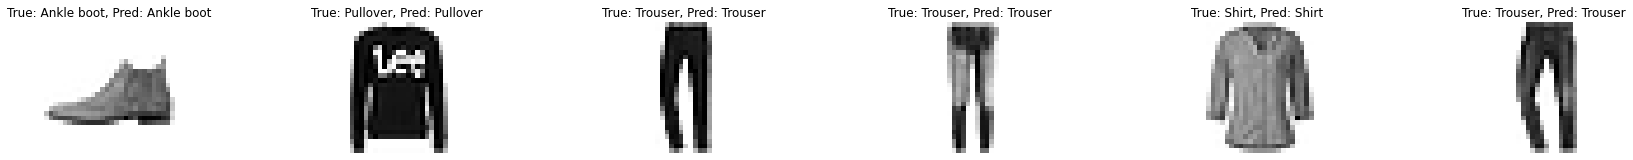

In [40]:
plt.figure(figsize=(30, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title('True: {}, Pred: {}'.format(class_names[y_test[index]], y_new[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

<hr>
<hr>

# Regression *MLP*

In [41]:
# import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
import keras
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
#split
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [43]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [44]:
# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [45]:
#model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1 )
])

In [46]:
#complile and fit the model
model.compile(loss="mean_squared_error", optimizer=tensorflow.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8376 - val_loss: 1.0720
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6953 - val_loss: 0.6397
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 0.5960
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6050 - val_loss: 0.5744
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5785 - val_loss: 0.5613
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5558 - val_loss: 0.5296
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5369 - val_loss: 0.5063
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5214 - val_loss: 0.5133
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4940
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4956 - val_loss: 0.4764

<hr>

#### Evaluate the model

After training, we want to evaluate our model


*   Calculate loss for test data



In [47]:
mse_test = model.evaluate(X_test, y_test)
mse_test
X_new = X_test[:3]
X_new
y_pred = model.predict(X_new)
y_pred

162/162 [==============================] - 0s 1ms/step - loss: 0.4253


array([[0.7789994],
       [1.6928985],
       [3.3641841]], dtype=float32)


<hr>

*   Plot training and validation loss

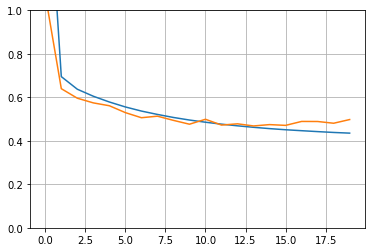

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<hr>
<hr>

# Saving and Restoring

In [49]:
# save the model
model.save("my_keras_model.h5")

In [50]:
# load the model
model = keras.models.load_model("my_keras_model.h5")

In [51]:
# prediction with loaded model
model.predict(X_new)

array([[0.7789994],
       [1.6928985],
       [3.3641841]], dtype=float32)

In [52]:
# save weights
model.save_weights("my_keras_weights.ckpt")

In [53]:
#load weights
model.load_weights("my_keras_weights.ckpt")

<hr>
<hr>


# Hyperparameter Tuning


In [54]:
# Clearing the session
# useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation.
keras.backend.clear_session()
np.random.seed(42)

In [59]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [60]:
param_distribs = {
    "n_hidden": np.arange(1, 4).tolist(),
    "n_neurons": np.arange(50, 100, 10).tolist(),
    "learning_rate": np.linspace(3e-4, 3e-2, 50).tolist()
}

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# this line wrap keras model to be compatiable with sklearn library
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=2, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


242/242 [==============================] - 2s 4ms/step - loss: 1.4538 - val_loss: 10.2944
Epoch 2/10
242/242 [==============================] - 1s 4ms/step - loss: 0.6891 - val_loss: 1.6262
Epoch 3/10
242/242 [==============================] - 1s 4ms/step - loss: 0.5109 - val_loss: 0.7168
Epoch 4/10
242/242 [==============================] - 1s 4ms/step - loss: 0.4620 - val_loss: 0.5296
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4350 - val_loss: 0.4582
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4167 - val_loss: 0.4495
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4045 - val_loss: 0.4265
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.3943 - val_loss: 0.4267
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.3866 - val_loss: 0.4234
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.3920
Epoch 1/10
242/242 [========

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fa0b1cf7f90>,
                   n_iter=2,
                   param_distributions={'learning_rate': [0.0003,
                                                          0.0009061224489795917,
                                                          0.0015122448979591834,
                                                          0.0021183673469387754,
                                                          0.002724489795918367,
                                                          0.003330612244897959,
                                                          0.003936734693877551,
                                                          0.004542857142857142,
                                                          0.005148979591836734,
                                                          0.005755102040816326,
                                                         

In [63]:
rnd_search_cv.best_params_

{'n_neurons': 50, 'n_hidden': 3, 'learning_rate': 0.02818163265306122}

<hr>

- What is the best score the model can obtain ?!

In [64]:
rnd_search_cv.best_score_

-0.32173238197962445

<hr>

- Get best model and evaluate it with test data

In [65]:
model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3395


0.33952075242996216